In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
sep_coins = cv2.imread('Desktop/DATA/pennies.jpg')

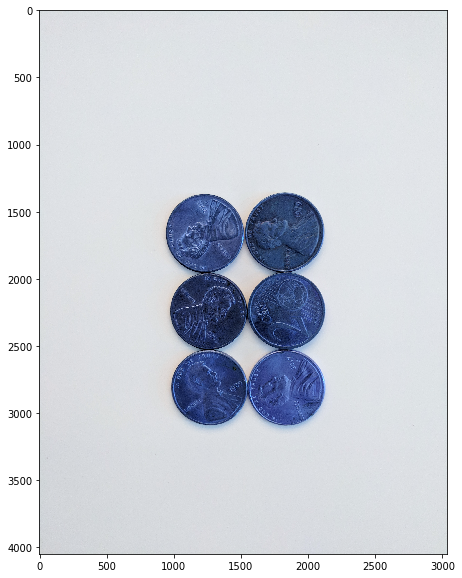

In [4]:
display(sep_coins)

In [5]:
#median blur
#gray scale
#binary thresold
#find contours



In [6]:
sep_blur = cv2.medianBlur(sep_coins,25)

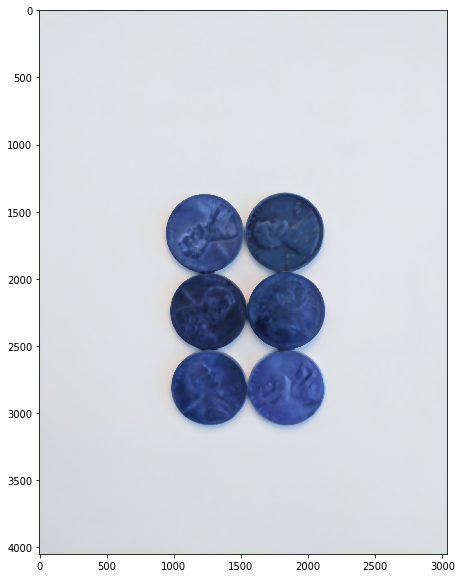

In [7]:
display(sep_blur)

In [8]:
gray_sep_coins = cv2.cvtColor(sep_coins, cv2.COLOR_BGR2GRAY)

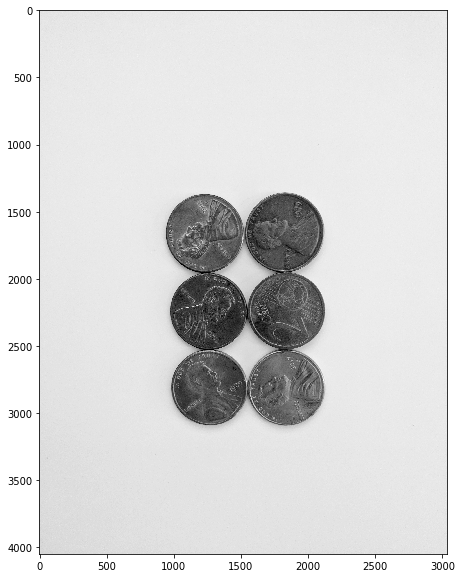

In [9]:
display(gray_sep_coins)

In [10]:
ret ,sep_thre =  cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

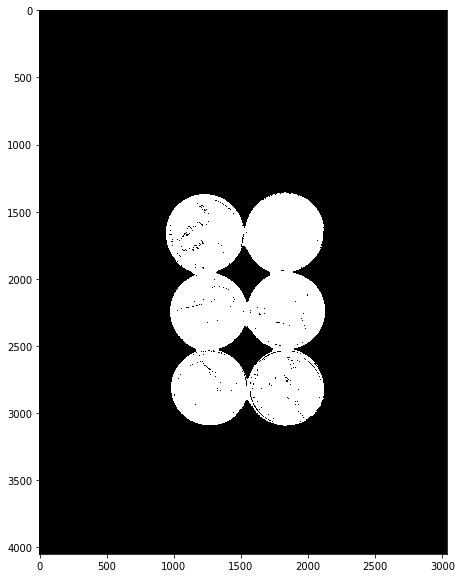

In [11]:
display(sep_thre)

In [12]:
image, contours, heirarchy = cv2.findContours(sep_thre.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE )

In [13]:
for i in range(len(contours)):
    if heirarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

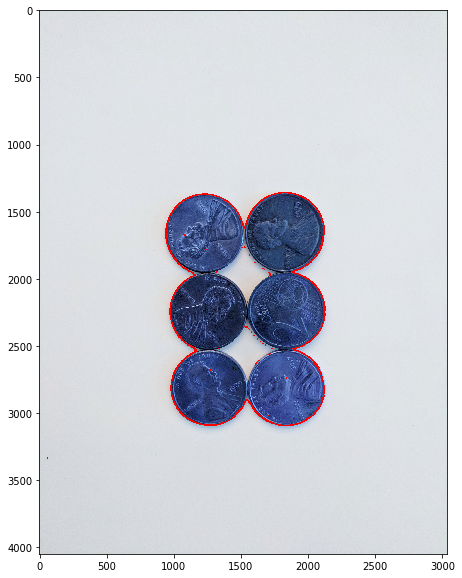

In [14]:
display(sep_coins)

In [15]:
img = cv2.imread('Desktop/DATA/pennies.jpg')

In [16]:
img = cv2.medianBlur(img,35)

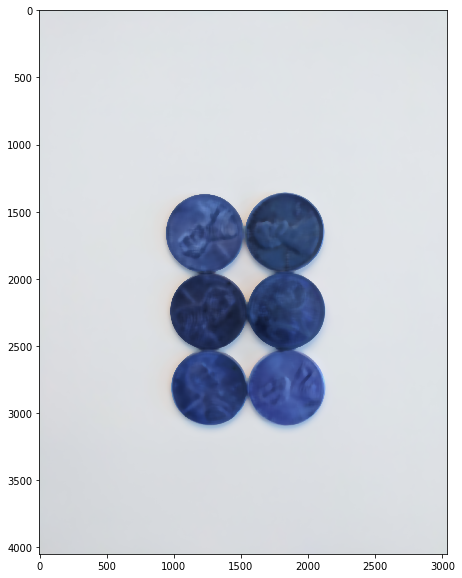

In [17]:
display(img)

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

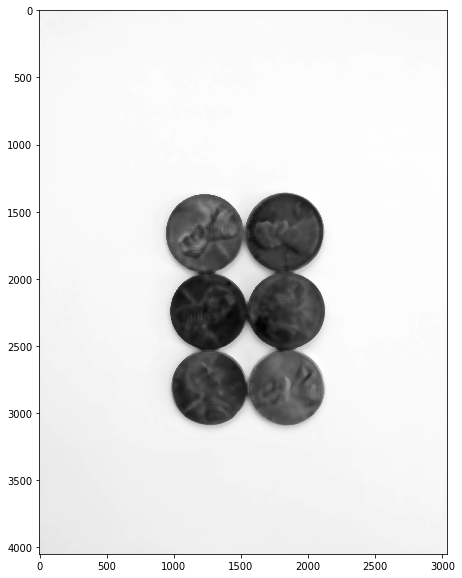

In [19]:
display(gray)

In [20]:
ret, thres = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

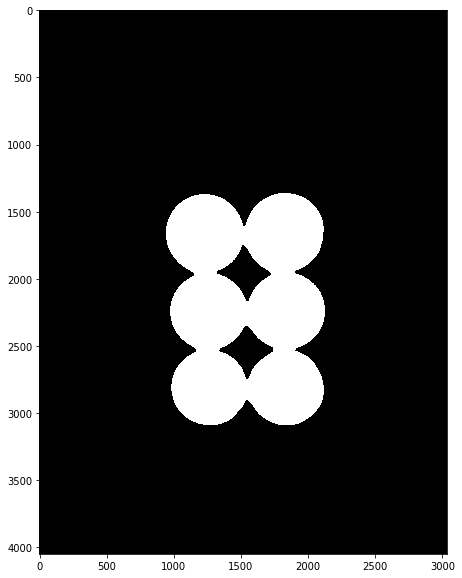

In [21]:
display(thres)

In [22]:
#NOISE REMOVAL

In [23]:
kernel = np.ones((3,3),np.uint8)

In [24]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [25]:
opening = cv2.morphologyEx(thres, cv2.MORPH_OPEN,kernel , iterations=2)

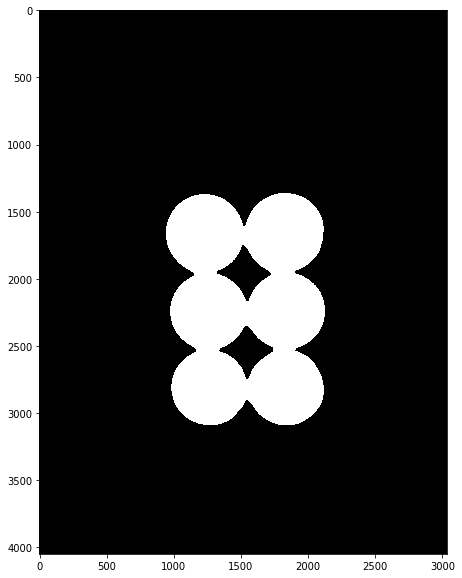

In [26]:
display(opening)

In [27]:
dist_transform = cv2.distanceTransform(opening ,cv2.DIST_L2,5)

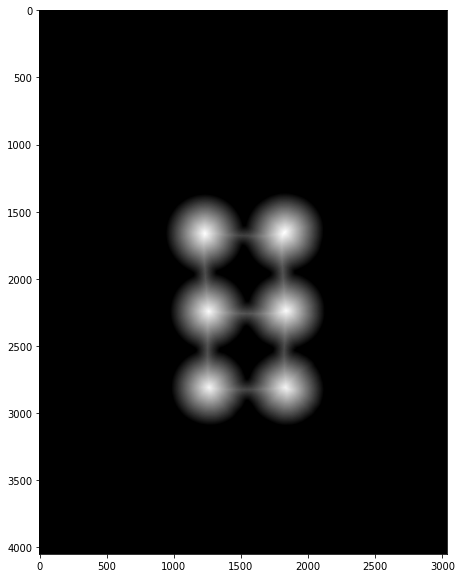

In [28]:
display(dist_transform)

In [29]:
ret, sure_fg =  cv2.threshold(dist_transform, 0.7*dist_transform.max() ,255,0)

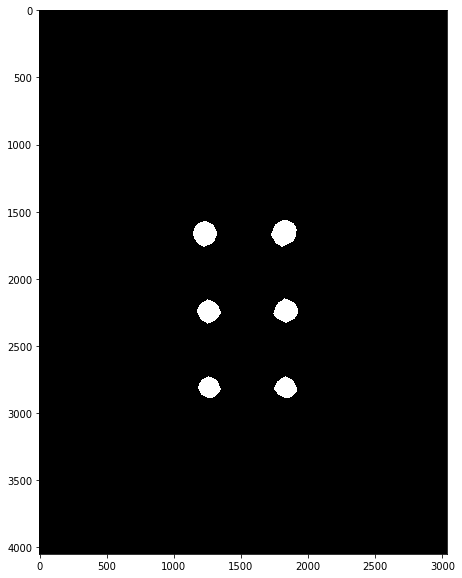

In [30]:
display(sure_fg)

In [33]:
sure_bg = cv2.dilate(opening, kernel, iterations =3)

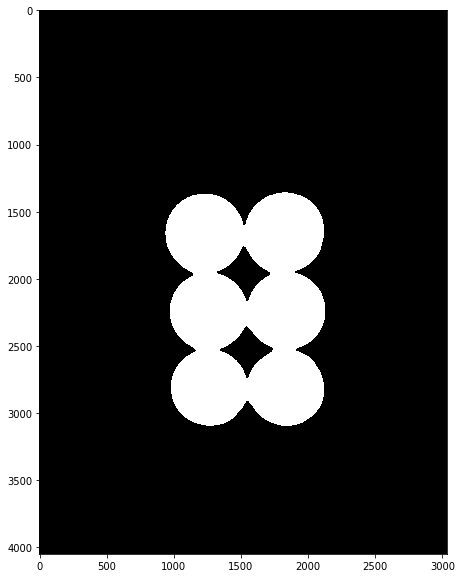

In [34]:
display(sure_bg)

In [31]:
sure_fg =np.uint8(sure_fg)

In [35]:
unknown = cv2.subtract(sure_bg,sure_fg)

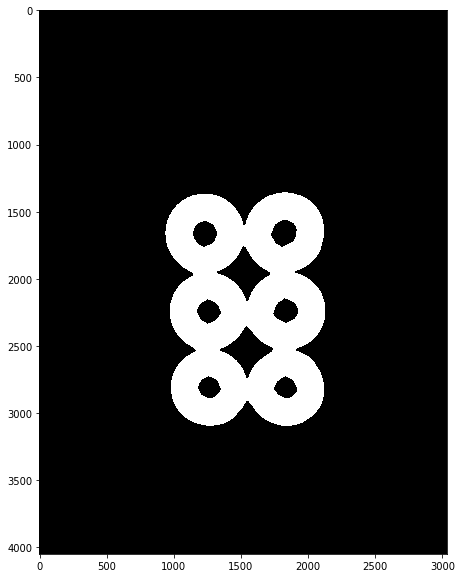

In [36]:
display(unknown)

In [37]:
ret , markers = cv2.connectedComponents(sure_fg)

In [38]:
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [39]:
 markers = markers +1

In [40]:
markers[unknown ==255]=0

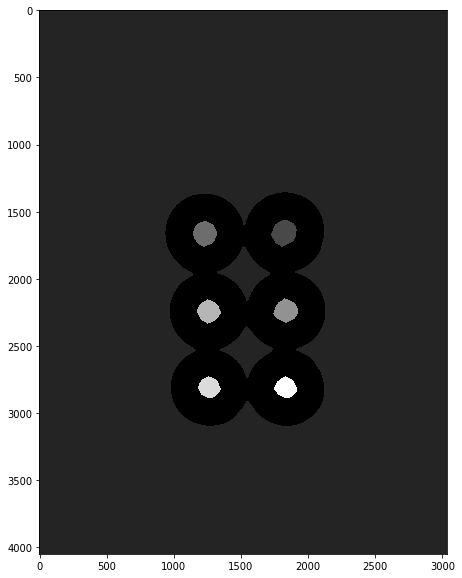

In [41]:
display(markers)

In [42]:
markers =cv2.watershed( img,markers)

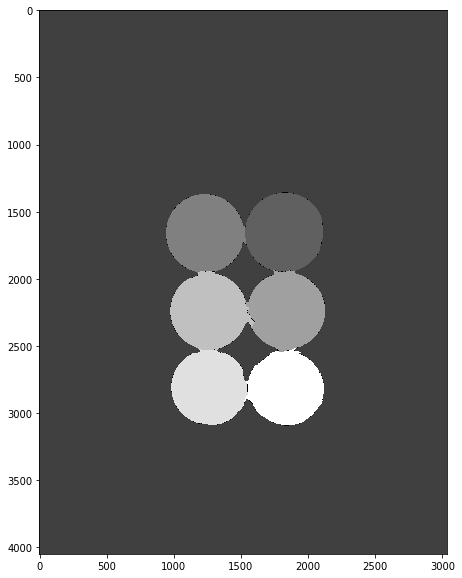

In [43]:
display(markers)

In [44]:
image, contours, heirarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE )

In [45]:
for i in range(len(contours)):
    if heirarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

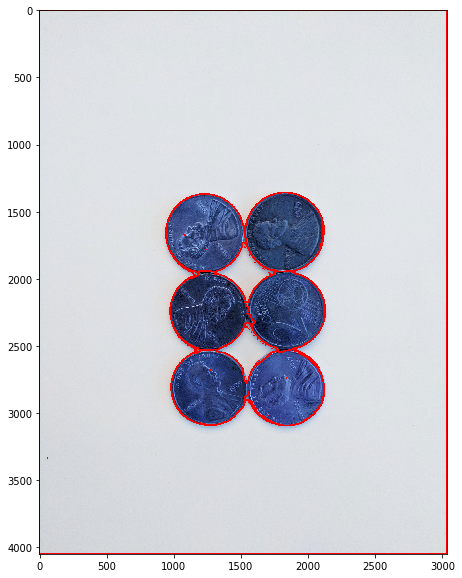

In [46]:
display(sep_coins)